<Figure size 800x500 with 0 Axes>

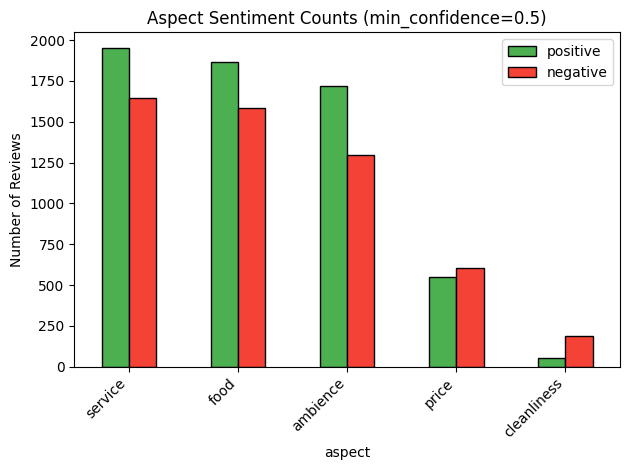

In [7]:
%matplotlib inline

import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_root)

import pandas as pd
import matplotlib.pyplot as plt
from src.data_ingest import load_reviews
from src.aspect_sentiment import batch_analyze
from src.report_gen import aggregate_aspect_sentiments

# Parameters
INPUT_CSV = "../data/restaurants_reviews.csv"
BATCH_SIZE = 16
MIN_CONFIDENCE = 0.50  # filter out < 0.50 if you like

# 1) Load & tag every review
df = load_reviews(INPUT_CSV)
df_tagged = batch_analyze(df, text_col="review_text", batch_size=BATCH_SIZE, min_confidence=MIN_CONFIDENCE)

# 2) Aggregate aspect counts
aspect_counts = aggregate_aspect_sentiments(df_tagged)

# 3) Build a DataFrame for plotting
plot_df = pd.DataFrame([
    {
        "aspect": aspect,
        "positive": counts["POSITIVE"],
        "negative": counts["NEGATIVE"]
    }
    for aspect, counts in aspect_counts.items()
])

plot_df = plot_df.set_index("aspect").sort_values("negative", ascending=False)

# 4) Plot side‐by‐side bars
plt.figure(figsize=(8, 5))
plot_df[["positive", "negative"]].plot(
    kind="bar",
    color=["#4CAF50", "#F44336"],  # green for positive, red for negative (optional)
    edgecolor="black"
)
plt.ylabel("Number of Reviews")
plt.title(f"Aspect Sentiment Counts (min_confidence={MIN_CONFIDENCE})")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


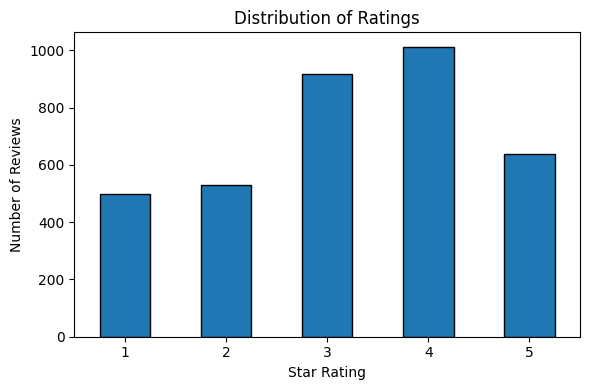

In [8]:
# In the same notebook (or a new cell)

ratings = df["rating"].value_counts().sort_index()
plt.figure(figsize=(6, 4))
ratings.plot(kind="bar", edgecolor="black")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
